This is a marven analytics challenge that requires the analysis of AirBnB lisitings in paris
filter the data to reamin only with rows containing paris
query the data checking for missing values,minimum,maximum and average for each numeric field

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import datetime as dt
from datetime import timedelta


In [8]:
#import the listing cvs file

listings = pd.read_csv(r'C:\Users\user\Documents\MAVEN ANALYTICS PROJECT\Airbnb Data\Listings.csv', encoding="ISO-8859-1", low_memory = False)

In [9]:

listings.head(10)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
5,4898654,NEW - Charming apartment Le Marais,505535,2011-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
6,6021700,2P - Entre Bastille et Republique,8053690,2013-08-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
7,6945740,57sqm btw. Bastille & PÃÂ¨re Lachaise,5924709,2013-04-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
8,7491966,Charming appartment near the Parc Buttes Chaumont,35812762,2015-06-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
9,7849932,Bel appartement plein de charme !,20833291,2014-09-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [18]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [15]:
# cast any date columns as a datetime format
listings['host_since'] = pd.to_datetime(listings['host_since'])


In [16]:
print(listings['host_since'].dtype)

datetime64[ns]


In [20]:
#drop other columns and retain only the required ones
columns_to_keep = ['host_since', 'neighbourhood','city','accommodates','price']
listings = listings[columns_to_keep]

In [22]:
listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [23]:
#filter to remain with cities where city is paris
filtered_listings = listings[listings['city'] == 'Paris']

In [24]:
filtered_listings

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [25]:
#confirm if the filter worked
count = filtered_listings['city'].value_counts()['Paris']
print(count)

64690


In [34]:
#check for null values 
listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [29]:
listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [38]:
listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

Objective 2
Prepare the data for visualization
Your second objective is to produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

In [56]:
# Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
paris_listings_neighbourhood = listings.groupby('neighbourhood')['price'].mean().sort_values()

paris_listings_neighbourhood

neighbourhood
Menilmontant            74.942257
Buttes-Chaumont         82.690182
Buttes-Montmartre       87.209479
Reuilly                 89.058402
Popincourt              90.559459
Gobelins                98.110184
Observatoire           101.866801
Batignolles-Monceau    102.612702
Enclos-St-Laurent      102.967156
Vaugirard              106.831330
Opera                  119.038644
Pantheon               122.662150
Temple                 138.446823
Hotel-de-Ville         144.472110
Bourse                 149.496801
Luxembourg             155.638639
Palais-Bourbon         156.856578
Passy                  161.144635
Louvre                 175.379972
Elysee                 210.536765
Name: price, dtype: float64

In [48]:
# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood,
# group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

most_expensive_neighbourhood = paris_listings_neighbourhood.idxmax()
filtered_df = listings[listings['neighbourhood'] == most_expensive_neighbourhood]

# Group by 'accommodations' and calculate the mean price
paris_listings_accommodations = filtered_df.groupby('accommodates')['price'].mean().sort_values()
paris_listings_accommodations


accommodates
0       0.000000
1      79.522222
3     152.828767
2     155.103352
4     212.096070
5     328.817073
6     355.508571
8     405.518519
7     411.538462
9     440.272727
10    500.857143
12    529.625000
16    800.000000
11    805.000000
13    842.500000
14    971.000000
Name: price, dtype: float64

In [52]:
# Create a table called paris_listings_over_time grouped by the ‘host_since’ year, 
# and calculate the average price and count of rows representing the number of new hosts

# Extract the year from 'host_since'
listings['host_since_year'] = listings['host_since'].dt.year

# Group by 'host_since_year' and calculate average price and count of rows
paris_listings_over_time = listings.groupby('host_since_year').agg({'price': 'mean', 'host_since': 'count'})

paris_listings_over_time

,price,host_since
host_since_year,,
2008.0,77.750000,4
2009.0,159.641509,106
2010.0,125.031250,416
2011.0,124.828230,1339
2012.0,111.578615,4592
2013.0,107.096414,8142
2014.0,100.253800,10922
2015.0,103.646250,12147
2016.0,114.159847,8871


Objective 3
Visualize the data and summarize findings
Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

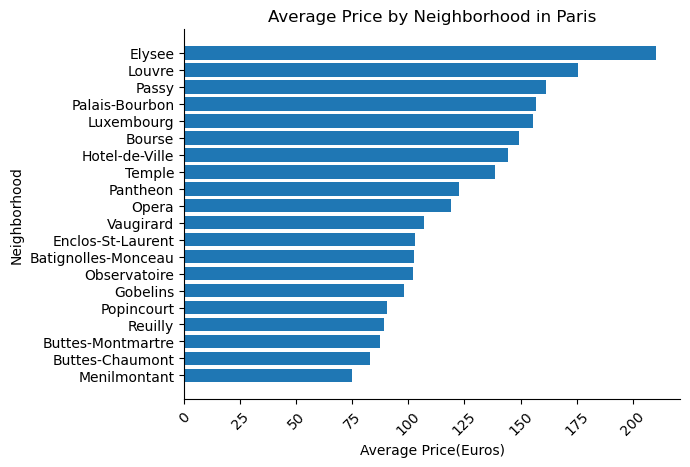

In [61]:
# Create a horizontal bar chart of the average price by neighborhood in Paris,
# and make sure to add a title and change axis labels as needed

# Create the horizontal bar chart
plt.barh(paris_listings_neighbourhood.index,paris_listings_neighbourhood.values)

# Set chart title and axis labels
plt.title('Average Price by Neighborhood in Paris')
plt.xlabel('Average Price(Euros)')
plt.ylabel('Neighborhood')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

sns.despine()

# Show the chart
plt.show()

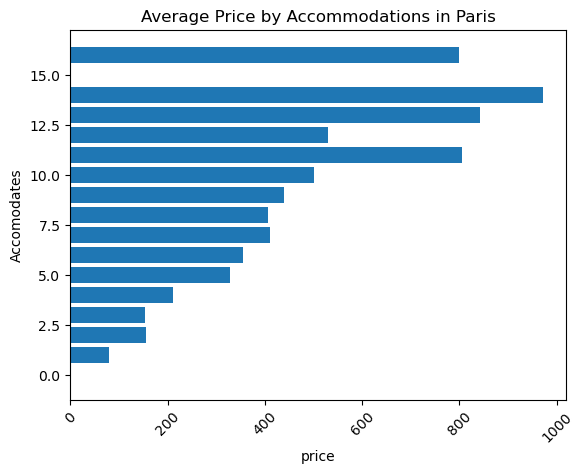

In [62]:
   

plt.barh(paris_listings_accommodations.index,paris_listings_accommodations.values)


# Set chart title and axis labels
plt.title('Average Price by Accommodations in Paris')
plt.xlabel('price')
plt.ylabel('Accomodates')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the chart
plt.show()

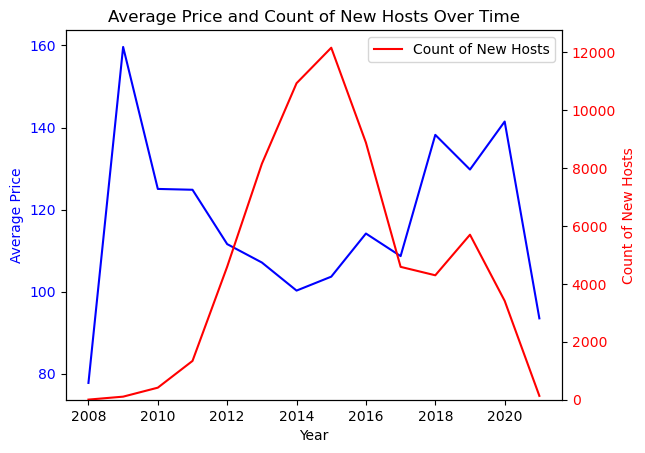

<Figure size 640x480 with 0 Axes>

In [76]:
# create two line charts:one of the coount of new hosts over time, and one for average  price
# make sure to set the y-axis to 0 , add a title and change axis labels as needed

import pandas as pd
import matplotlib.pyplot as plt

# Create two subplots
fig, ax1 = plt.subplots()

# Plot the average price on the left y-axis
ax1.plot(paris_listings_over_time.index, paris_listings_over_time['price'], color='blue', label='Average Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the count of new hosts
ax2 = ax1.twinx()

# Plot the count of new hosts on the right y-axis
ax2.plot(paris_listings_over_time.index, paris_listings_over_time['host_since'], color='red', label='Count of New Hosts')
ax2.set_ylabel('Count of New Hosts', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.set_ylim(0)

# Set chart title and legend
plt.title('Average Price and Count of New Hosts Over Time')
plt.legend()

# Show the chart
plt.show()

sns.despine()

# 2015 regulations resulted in fewer hosts resulting in higher prices